## The Normal Equation

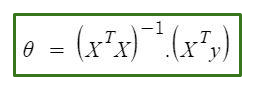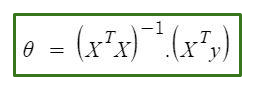

Normal Equation is an analytical approach to Linear Regression with a Least Square Cost Function. We can directly find out the value of θ without using Gradient Descent. Following this approach is an effective and time-saving option when working with a dataset with small features. Normal Equation method is based on the mathematical concept of Maxima & Minima in which the derivative and partial derivative of any function would be zero at the minima and maxima point. So, in Normal Equation method, we get the minimum value of the Cost function by finding its partial derivative w.r.t to each weight and equating it to zero.

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

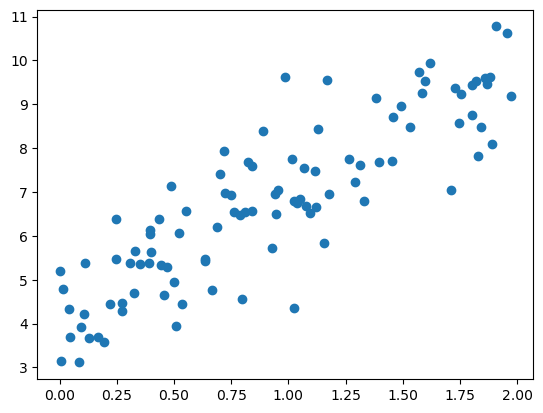

In [50]:
plt.scatter(X,y)
plt.show()

In [51]:
X_b = np.c_[np.ones((100,1)),X]
X_b[:10]

array([[1.        , 0.63612085],
       [1.        , 0.44177277],
       [1.        , 0.24507794],
       [1.        , 0.00672322],
       [1.        , 0.74688498],
       [1.        , 0.79889827],
       [1.        , 0.94284173],
       [1.        , 1.13095153],
       [1.        , 0.88830636],
       [1.        , 1.84414704]])

In [52]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.17600786],
       [2.8205532 ]])

In [53]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]

In [54]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [55]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17600786],
       [9.81711426]])

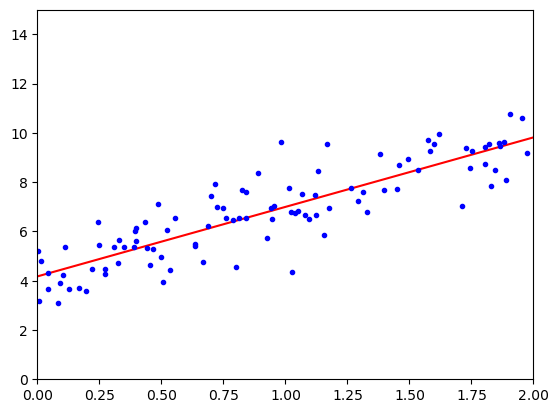

In [56]:
plt.plot(X_new, y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

### Performing Linear Regression With SciKit Learn

In [57]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [58]:
print("Slope (M): ",lin_reg.coef_)
print("Intercept (C): ",lin_reg.intercept_)


Slope (M):  [[2.8205532]]
Intercept (C):  [4.17600786]


In [59]:
pred = lin_reg.predict([[0],[2]])

## Gradient Descent
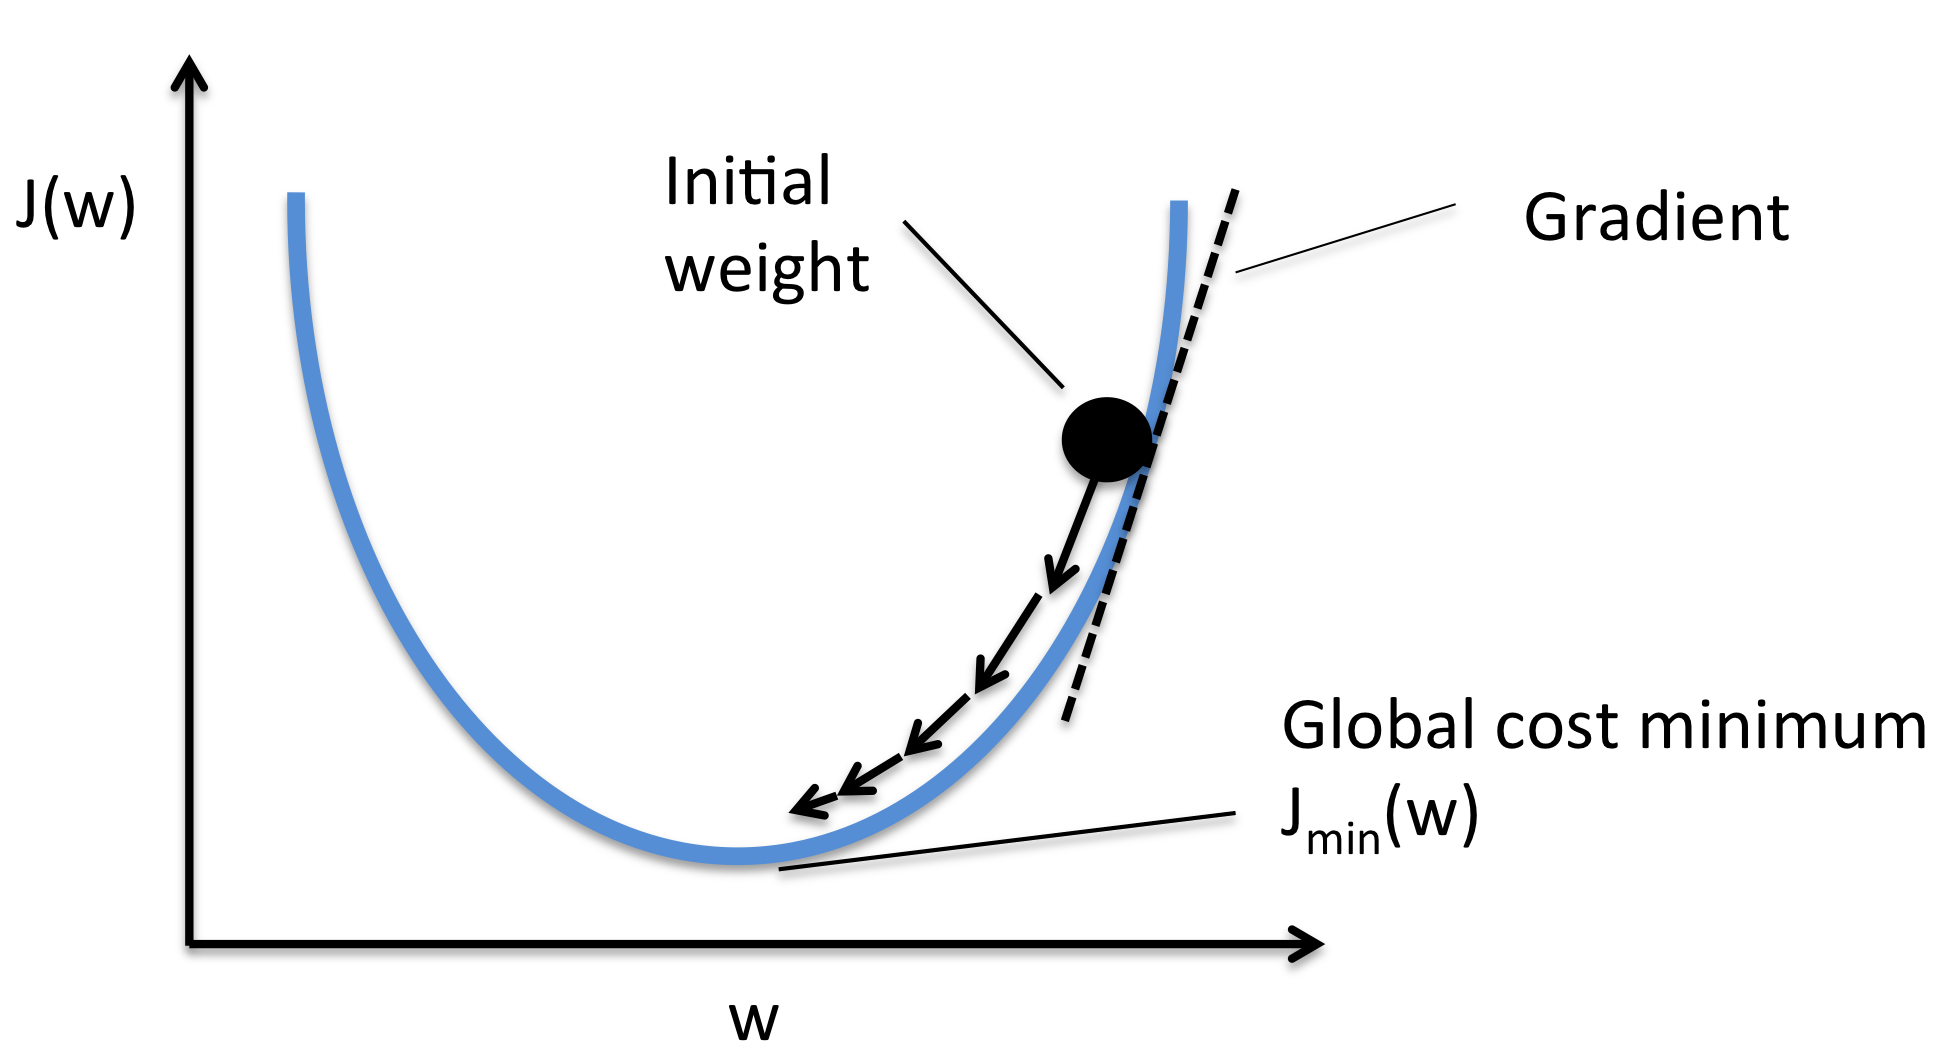

In mathematics, gradient descent (also often called steepest descent) is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. 

In [60]:
learning_rate = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
gd_steps = []

In [61]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - learning_rate*gradients
    if iteration % 100 == 0:
        gd_steps.append(theta)
theta

array([[4.17600786],
       [2.8205532 ]])

### Stochastic Gradient Descent

In [62]:
n_epochs = 50
t0,t1 = 5,50

def learning_schedule(t):
    return t0 / (t+t1)

theta_sgd = np.random.randn(2,1)
steps_20 = []

X_b_copy = X_b.copy()
y_copy = y.copy()

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b_copy[random_index:random_index+1]
        yi = y_copy[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - eta * gradients
        if epoch % 2 == 0:
            steps_20.append(theta_sgd)

theta_sgd

array([[-1.23391541],
       [-1.46296139]])

In [63]:
X_sgd_new = np.array([[0],[2]])
X_new_sgd = np.c_[np.ones((2,1)),X_new]

In [64]:
y_predict_sgd = X_new_sgd.dot(theta_sgd)
y_predict_sgd

array([[-1.23391541],
       [-4.15983819]])

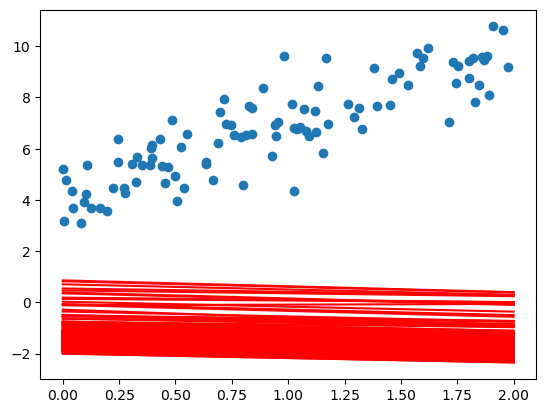

In [67]:
plt.scatter(X,y)
# plt.plot(X_sgd_new, y_predict_sgd,"r-")
for i in steps_20:
    plt.plot(X_sgd_new, i,"r-")

### Performing Stochastic Gradient Descent Using SciKit Learn

In [69]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [73]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15033607]), array([2.79119843]))